In [7]:
import requests
import matplotlib.pyplot as plt
from json import dumps
from tqdm.notebook import tqdm
from time import time
from random import choice, randint

# Получаем информацию о юзере (своем)

In [2]:
username = 'tam2511'
password = '081099asd'

r = requests.get('https://back.fishow.ru/api/user/', auth=(username, password))
print('status code: {}'.format(r.status_code))
print('json response:')
print('======================================')
print(dumps(r.json(), indent=4))

status code: 403
json response:
{
    "detail": "Invalid username/password."
}


# Получаем список всех юзеров

In [3]:
r = requests.get('https://back.fishow.ru/api/user_all/', auth=(username, password))
print('status code: {}'.format(r.status_code))
# print('json response:')
# print('======================================')
# print(dumps(r.json(), indent=4))

status code: 500


# Получаем список понравившихся статей юзера

In [4]:
r = requests.get('https://back.fishow.ru/api/user/liked/blogs/', auth=(username, password))
print('status code: {}'.format(r.status_code))
print('json response:')
print('======================================')
print(dumps(r.json(), indent=4))

status code: 200
json response:
{
    "count": 1,
    "next": null,
    "previous": null,
    "results": [
        {
            "id": 7,
            "author": "damir2",
            "created_at": "27.02.21 19:53",
            "likes_count": 2,
            "dislikes_count": 0,
            "user_has_votedUp": true,
            "user_has_votedDown": false,
            "user_saved": false,
            "slug": "sadasd-qzqs5a",
            "comments_count": 1,
            "user_has_commented": false,
            "time_from_creations": "1\u00a0week",
            "user_views": 3,
            "is_author": false,
            "title": "sadasd",
            "content": "{\"blocks\":[[{\"type\":\"text\",\"body\":\"Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Tortor at auctor urna nunc id cursus. Sodales neque sodales ut etiam sit amet. Quis hendrerit dolor magna eget est lorem ipsum dolor. Mauris a diam maecenas sed enim 

# Получаем список созданных статей юзера

In [13]:
r = requests.get('https://back.fishow.ru/api/user/created/blogs/', auth=(username, password))
print('status code: {}'.format(r.status_code))
print('json response:')
print('======================================')
print(dumps(r.json(), indent=4))

status code: 200
json response:
{
    "count": 1007,
    "next": "http://45.90.35.152:8000/api/user/created/blogs/?page=2",
    "previous": null,
    "results": [
        {
            "id": 1011,
            "author": "tam2511",
            "created_at": "07.03.21 12:20",
            "likes_count": 0,
            "dislikes_count": 0,
            "user_has_votedUp": false,
            "user_has_votedDown": false,
            "user_saved": false,
            "slug": "test-999-j2my0m",
            "comments_count": 0,
            "user_has_commented": false,
            "time_from_creations": "3\u00a0minutes",
            "user_views": 0,
            "is_author": true,
            "title": "Test 999",
            "content": "{\"blocks\":[[{\"type\":\"text\",\"body\":\"Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Tortor at auctor urna nunc id cursus. Sodales neque sodales ut etiam sit amet. Quis hendrerit dolor

# Получаем список лайкнутых юзером комментариев всех статей

In [31]:
r = requests.get('https://back.fishow.ru/api/user/liked/blogs/comment/', auth=(username, password))
print('status code: {}'.format(r.status_code))
print('json response:')
print('======================================')
print(dumps(r.json(), indent=4))

status code: 200
json response:
{
    "count": 1,
    "next": null,
    "previous": null,
    "results": [
        {
            "id": 3,
            "author": "irnbru007",
            "created_at": "February 27, 2021",
            "likes_count": 2,
            "dislikes_count": 0,
            "user_has_votedUp": true,
            "user_has_votedDown": false,
            "comments_slug": "4564-hdcqty",
            "body": "\u044f\u0447\u0441\u0427\u041c\u044f\u0447\u043c\u044f\u0447"
        }
    ]
}


# Получаем список созданных юзером комментариев всех статей

In [7]:
r = requests.get('https://back.fishow.ru/api/user/created/blogs/comment/', auth=(username, password))
print('status code: {}'.format(r.status_code))
print('json response:')
print('======================================')
print(dumps(r.json(), indent=4))

status code: 200
json response:
{
    "count": 1,
    "next": null,
    "previous": null,
    "results": [
        {
            "id": 2,
            "author": "tam2511",
            "created_at": "February 24, 2021",
            "likes_count": 0,
            "dislikes_count": 0,
            "user_has_votedUp": false,
            "user_has_votedDown": false,
            "comments_slug": "kak-lovit-ryibu-chast-1-q0bsid",
            "body": "\u041f\u043e\u043a\u0430!"
        }
    ]
}


# Создание 1000 юзеров

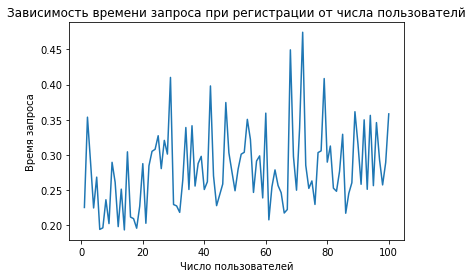

In [3]:
data = [
    {
        'username': 'test_{}'.format(i),
        'email': 'test_{}@mail.ru'.format(i),
        'password1': '081099asd',
        'password2': '081099asd'
    }
    for i in range(100)
]
times = []
for i in tqdm(range(len(data))):
    st = time()
    r = requests.post('https://back.fishow.ru/api/rest-auth/registration/', json=data[i])
    times.append(time() - st)
    if r.status_code != 201:
        print(r)
        print('Error during registration: {}'.format(data[i]))
        break
if len(times) == 100:
    plt.plot(list(range(1, 101)), times)
    plt.title("Зависимость времени запроса при регистрации от числа пользователй")
    plt.xlabel("Число пользователей")
    plt.ylabel("Время запроса")
    plt.show()

# Создаем 1000 статей

ValueError: x and y must have same first dimension, but have shapes (1000,) and (100,)

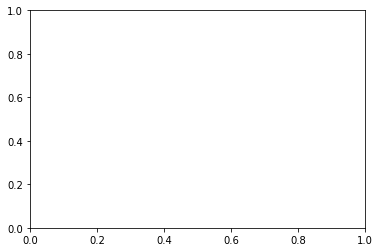

In [9]:
content = "{\"blocks\":[[{\"type\":\"text\",\"body\":\"Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Tortor at auctor urna nunc id cursus. Sodales neque sodales ut etiam sit amet. Quis hendrerit dolor magna eget est lorem ipsum dolor. Mauris a diam maecenas sed enim ut sem. Maecenas sed enim ut sem viverra aliquet eget sit. Tempor nec feugiat nisl pretium fusce id velit. Aliquam sem fringilla ut morbi. Volutpat commodo sed egestas egestas fringilla phasellus faucibus scelerisque. Mollis aliquam ut porttitor leo a. Ipsum consequat nisl vel pretium lectus quam id. Sed risus ultricies tristique nulla aliquet enim tortor. Semper quis lectus nulla at volutpat diam ut.\\n\\nGravida quis blandit turpis cursus. Massa massa ultricies mi quis hendrerit dolor magna. Tincidunt eget nullam non nisi est. Et ligula ullamcorper malesuada proin libero nunc consequat. Id aliquet lectus proin nibh nisl. Viverra nam libero justo laoreet sit. Viverra accumsan in nisl nisi scelerisque eu ultrices vitae auctor. Venenatis urna cursus eget nunc scelerisque viverra mauris in aliquam. Vulputate odio ut enim blandit volutpat maecenas volutpat blandit. Et netus et malesuada fames ac turpis egestas integer. Vel facilisis volutpat est velit egestas dui id. Id cursus metus aliquam eleifend mi in. Sed risus ultricies tristique nulla aliquet enim. Id diam maecenas ultricies mi eget mauris pharetra. At volutpat diam ut venenatis tellus in. In aliquam sem fringilla ut morbi. Habitasse platea dictumst quisque sagittis. Egestas integer eget aliquet nibh praesent. Nec feugiat nisl pretium fusce.\\n\\nAuctor neque vitae tempus quam pellentesque nec nam aliquam sem. Nibh venenatis cras sed felis. Eget mi proin sed libero enim. Sagittis orci a scelerisque purus semper eget duis at. Platea dictumst vestibulum rhoncus est pellentesque elit ullamcorper dignissim. Ultricies integer quis auctor elit sed vulputate mi sit. Velit sed ullamcorper morbi tincidunt ornare massa eget egestas purus. Id interdum velit laoreet id donec ultrices tincidunt arcu non. At urna condimentum mattis pellentesque id nibh tortor id. Volutpat maecenas volutpat blandit aliquam etiam. Purus viverra accumsan in nisl. Pellentesque eu tincidunt tortor aliquam nulla facilisi cras fermentum odio. Donec massa sapien faucibus et molestie ac. Massa tempor nec feugiat nisl pretium. Cras semper auctor neque vitae tempus quam pellentesque. Aliquet porttitor lacus luctus accumsan tortor posuere ac ut consequat. Lobortis feugiat vivamus at augue eget arcu dictum varius. In tellus integer feugiat scelerisque varius. Sed arcu non odio euismod lacinia.\\n\\nUltricies mi eget mauris pharetra. Fermentum dui faucibus in ornare. Dis parturient montes nascetur ridiculus mus. Dis parturient montes nascetur ridiculus mus. Morbi non arcu risus quis varius quam quisque id. Nullam vehicula ipsum a arcu cursus vitae congue mauris rhoncus. Curabitur gravida arcu ac tortor dignissim. Malesuada pellentesque elit eget gravida cum sociis natoque penatibus et. Nullam vehicula ipsum a arcu cursus. Turpis cursus in hac habitasse platea dictumst quisque sagittis. Ullamcorper velit sed ullamcorper morbi tincidunt. Cursus risus at ultrices mi tempus imperdiet nulla. Imperdiet dui accumsan sit amet.\\n\\nUrna nunc id cursus metus aliquam eleifend mi in nulla. Euismod nisi porta lorem mollis. Nulla porttitor massa id neque aliquam vestibulum morbi blandit cursus. Amet volutpat consequat mauris nunc congue nisi vitae suscipit tellus. Ac tincidunt vitae semper quis lectus nulla at volutpat diam. Ut tristique et egestas quis ipsum suspendisse ultrices gravida. Etiam dignissim diam quis enim. Ut diam quam nulla porttitor massa. Maecenas pharetra convallis posuere morbi leo urna molestie at. Proin libero nunc consequat interdum varius sit amet mattis vulputate. Egestas diam in arcu cursus euismod. Dui faucibus in ornare quam viverra. Risus nullam eget felis eget nunc lobortis. Senectus et netus et malesuada fames ac turpis. Vitae elementum curabitur vitae nunc. Arcu vitae elementum curabitur vitae nunc sed velit dignissim. Fermentum iaculis eu non diam phasellus vestibulum lorem. Facilisis gravida neque convallis a cras semper auctor neque. Sed sed risus pretium quam. Non odio euismod lacinia at quis risus.\",\"name\":\"textField0\"}]]}"
tags = "[\"Текст\", \"Щука\"]"
category = "Блоги"
times = []
num = 100
for i in tqdm(range(num)):
    st = time()
    data = {
        'content': content,
        'tags': tags,
        'category': category,
        'title': 'Test {}'.format(i)
    }
    r = requests.post('https://back.fishow.ru/api/blogs/', json=data, auth=('test_{}'.format(randint(1, 50)), '081099asd'))
    times.append(time() - st)
    if r.status_code != 201:
        print(r)
        print('Error during creating blog: {}'.format(i))
        break
if len(times) == 100:
    plt.plot(list(range(1, 101)), times)
    plt.title("Зависимость времени запроса при создании статьи от числа статей")
    plt.xlabel("Число статей")
    plt.ylabel("Время запроса")
    plt.show()        

# Лайкаем случайные статьи случайными пользователями 10000 раз

In [11]:
users = [('test_{}'.format(i), '081099asd') for i in range(100)]
# получаем слаги всех статей
current_url = 'https://back.fishow.ru/api/blogs/'
slugs = []
for i in tqdm(range(1000)):
    r = requests.get(current_url)
    data = [_['slug'] for _ in r.json()['results']]
    slugs += data
    if not 'next' in r.json():
        break
    current_url = r.json()['next']
    if not current_url:
        break

In [12]:
times = []
for i in tqdm(range(1000)):
    user = choice(users)
    article = choice(slugs)
    url = 'https://back.fishow.ru/api/blogs/{}/like/'.format(article)
    st = time()
    r = requests.post(url, auth=user)
    times.append(time() - st)
    if r.status_code != 200:
        print(r)
        print('Error during liking blog {} by user {}'.format(article, user))
        

In [39]:
%%time
r = requests.get('https://back.fishow.ru/api/count/user/')
print(r.status_code)
print(r.json())

200
[{'count_user': 1010}]
Wall time: 118 ms
